In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('figure',  figsize=(10, 6))
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import os
import pims
import trackpy as tp
import preprocess
from register import combine, register

In [2]:
os.chdir('/Users/yifan/Dropbox/ZYF/dev/GitHub/automated-centrosome-pairing/data/2018-01-17_GSC_L4_L4440_RNAi/')
frames = pims.ImageSequenceND('hr/*.tif', axes_identifiers = ['t', 'z'])
frames.bundle_axes = ['z', 'y', 'x']
frames.iter_axes = 't'
frames

<ImageSequenceND>
Source: /Users/yifan/Dropbox/ZYF/dev/GitHub/automated-centrosome-pairing/data/2018-01-17_GSC_L4_L4440_RNAi/hr/*.tif
Axes: 4
Axis 't' size: 79
Axis 'z' size: 38
Axis 'y' size: 325
Axis 'x' size: 880
Pixel Datatype: uint16

The time-index of the first frame is always 0, regardless of the index in the filename. We can use pims 3d scrollable stack feature to display a 3D image. Use the scroll wheel to scroll through the focal planes.

This feature will not work online, download the example and run it yourself to checkout the scrollable stack feature.

Frame([[[54, 43, 32, ..., 73, 49, 39],
        [39, 48, 78, ..., 57, 48, 49],
        [64, 64, 67, ..., 39, 68, 69],
        ...,
        [71, 55, 60, ..., 57, 38, 45],
        [58, 72, 58, ..., 53, 33, 83],
        [54, 59, 53, ..., 65, 72, 74]],

       [[71, 86, 62, ..., 79, 43, 54],
        [52, 41, 53, ..., 48, 60, 50],
        [63, 53, 71, ..., 64, 59, 72],
        ...,
        [62, 64, 66, ..., 53, 44, 36],
        [68, 64, 49, ..., 67, 66, 54],
        [70, 40, 90, ..., 66, 70, 53]],

       [[63, 59, 59, ..., 83, 74, 60],
        [62, 54, 64, ..., 63, 47, 39],
        [48, 64, 50, ..., 51, 86, 66],
        ...,
        [52, 43, 72, ..., 38, 58, 71],
        [69, 70, 65, ..., 60, 66, 59],
        [59, 31, 53, ..., 58, 69, 60]],

       ...,

       [[43, 47, 55, ..., 55, 54, 73],
        [72, 50, 58, ..., 49, 42, 78],
        [52, 76, 77, ..., 64, 65, 53],
        ...,
        [70, 99, 59, ..., 58, 69, 53],
        [46, 57, 68, ..., 49, 51, 57],
        [70, 72, 59, ..., 92, 70, 43]],

       [[47, 47, 43, ..., 45, 49, 66],
        [40, 67, 49, ..., 60, 43, 63],
        [62, 50, 38, ..., 48, 80, 63],
        ...,
        [72, 66, 70, ..., 45, 34, 52],
        [64, 61, 51, ..., 61, 56, 81],
        [66, 76, 72, ..., 66, 65, 64]],

       [[54, 45, 66, ..., 63, 65, 62],
        [66, 51, 52, ..., 64, 63, 74],
        [43, 33, 73, ..., 73, 47, 84],
        ...,
        [53, 40, 44, ..., 66, 59, 36],
        [54, 50, 50, ..., 63, 83, 81],
        [54, 71, 73, ..., 46, 47, 42]]], dtype=uint16)
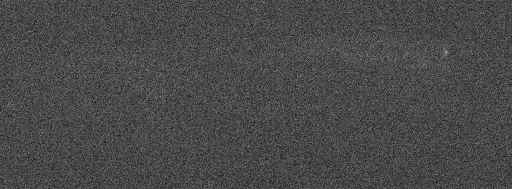
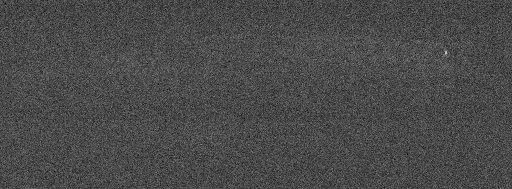
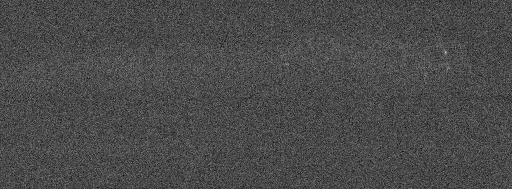
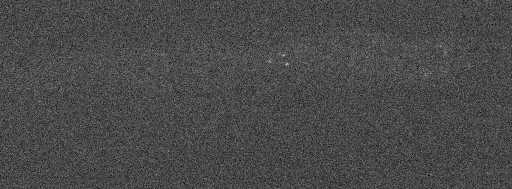
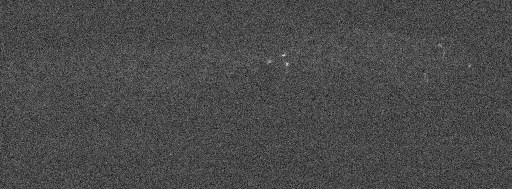
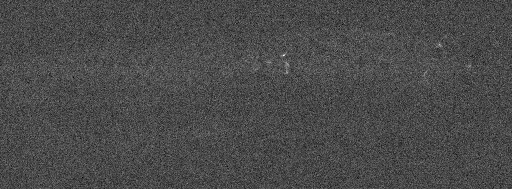
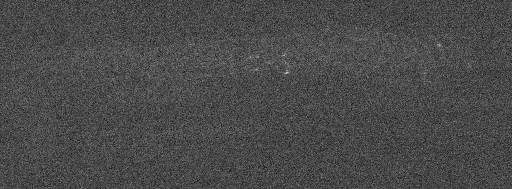
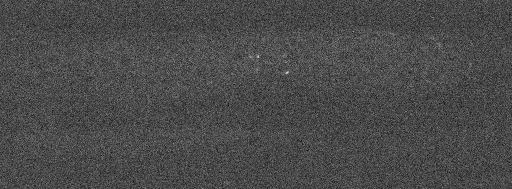
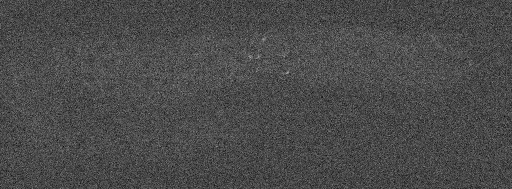
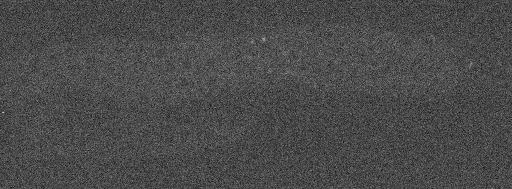
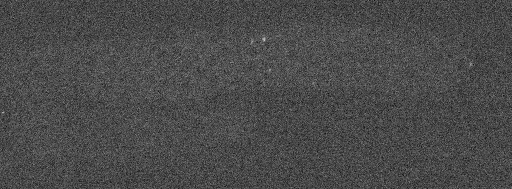
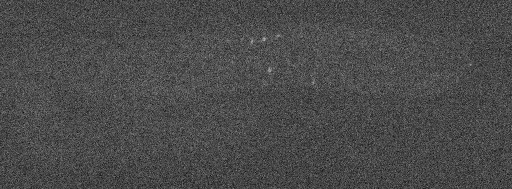
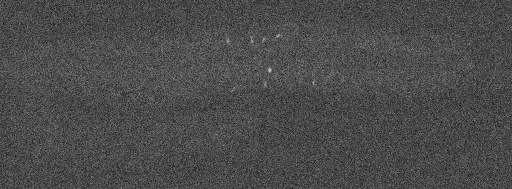
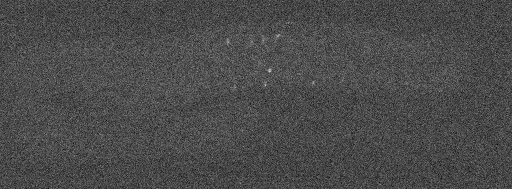
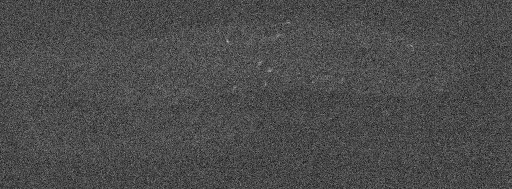
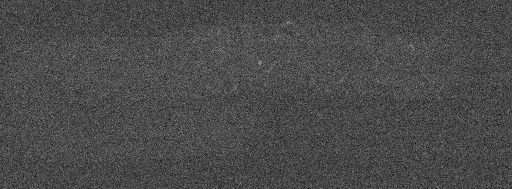
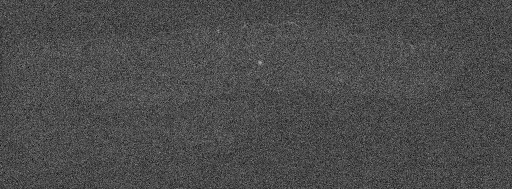
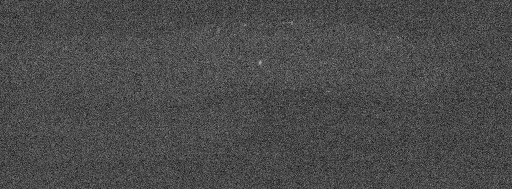
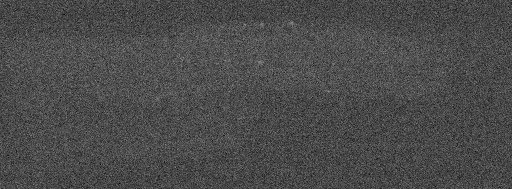
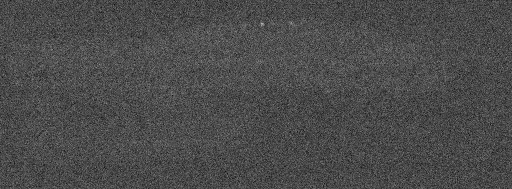
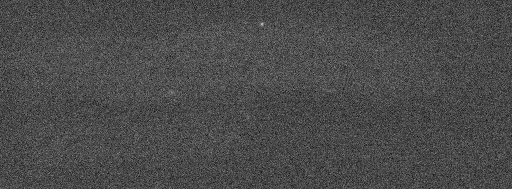
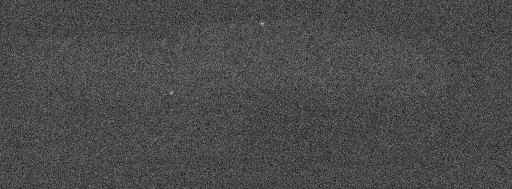
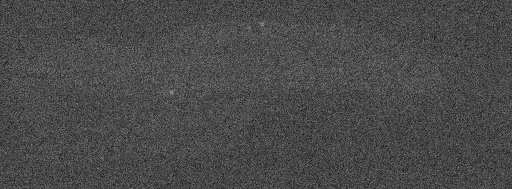
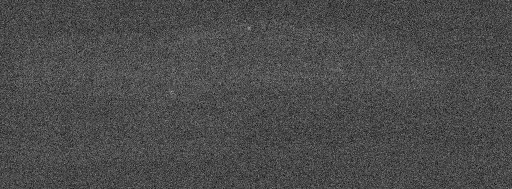
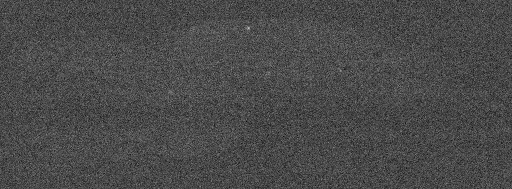
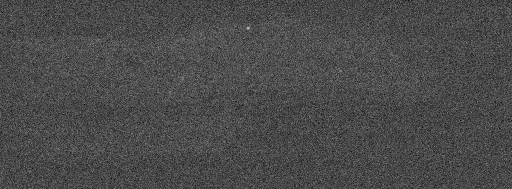
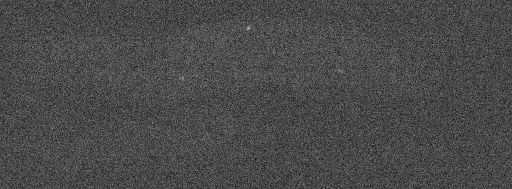
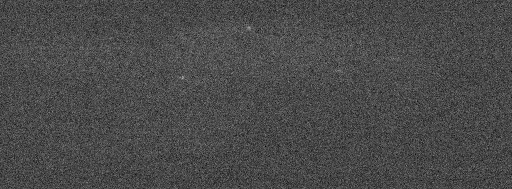
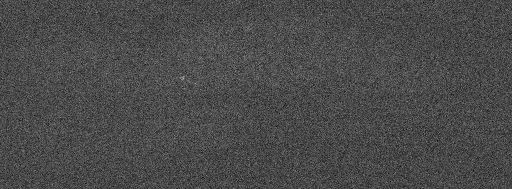
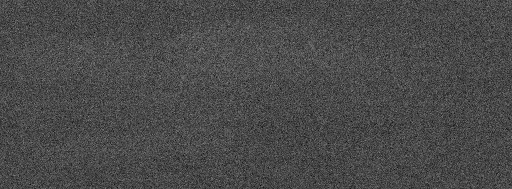
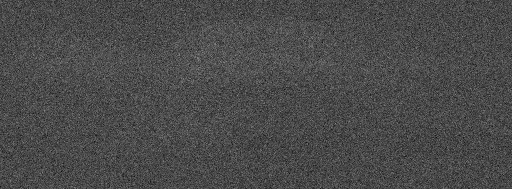
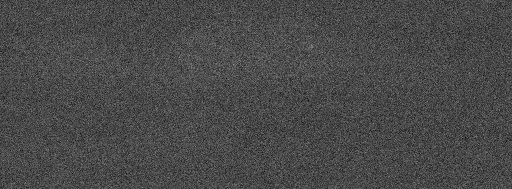
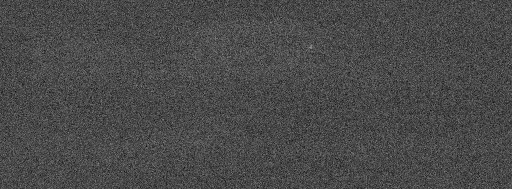
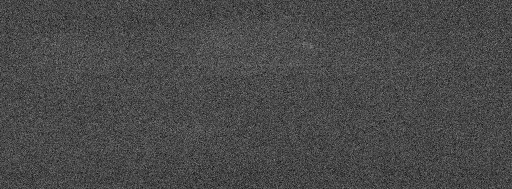
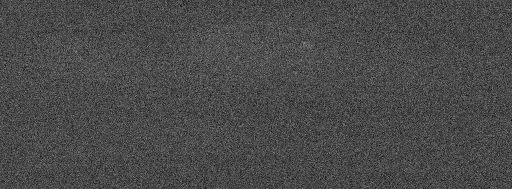
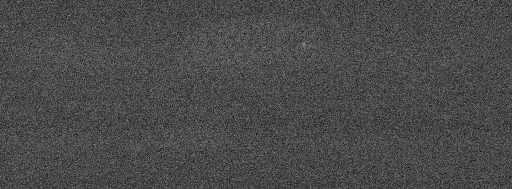
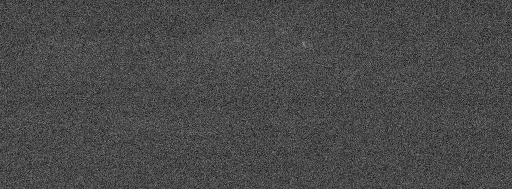
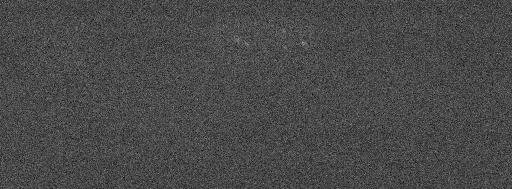

In [3]:
frames[5]

In [4]:
from preprocess import pairer
xml_path = 'u_germline.xml'
tiff_path = 'u_germline.tif'
#initialize
mySpotsPairer = pairer()
# merge
mySpotsPairer.merge(xml_path)
# find true pairs
features = mySpotsPairer.findTruePair(verbose = False)
features.head(5)

t      Z_UM       Y_UM        X_UM    ID_I    ID_J     SL_UM  SUMINT
0  0  1.092323  21.852769  137.227872  380311  380322  9.906140   13814
1  0  1.555001  20.230306   92.218066  380317  380318  3.006833   15093
2  0  1.344250  17.897044  140.861095  380316  380319  8.708784   11258
3  0  0.623149  20.133105  140.511832  380319  380311  4.468692   12822
4  0  2.020080  22.798558   92.660170  380318  380327  2.544803   14956

The linking features of trackpy support an arbitrary number of dimensions. The argument pos_columns will determine which and how many dimensions will be used. The standard set of columns is ['x', 'y']. For 3d we have to set this to ['x', 'y', 'z']. Linking treats all dimensions equally. For this example we are using a file with unequal pixel sizes: 0.18 microns in XY and 0.5 microns in Z, so we first do the conversion.

In [5]:
# compute pixel 
f = features
f['z'] = f['Z_UM'] * 2.0
f['y'] = f['Y_UM'] * 5.5
f['x'] = f['X_UM'] * 5.5
f['frame'] = f['t']

Frame([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       ...,

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)
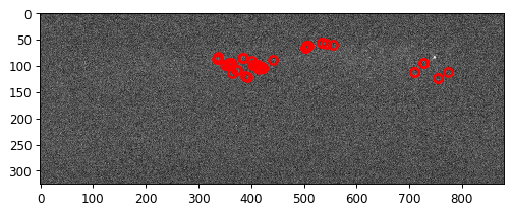

In [25]:
import tifffile
# annotated = tp.anno
# annotated(f, frames[12], plot_style={'markersize': 7})
# tifffile.imwrite('temp.tif',annotated)
with tifffile.TiffWriter("./temp.tif") as tif:
    for i in range(annotated.shape[0]):
        tif.save(annotated[i])
annotated[1]

Features found: 1183


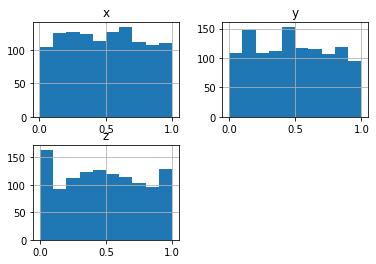

In [7]:
tp.subpx_bias(f)
print('Features found: {0}'.format(len(f)))

Frame 78: 6 trajectories present.


/Users/yifan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


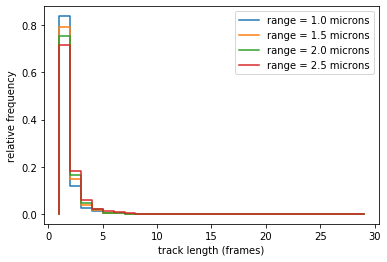

In [8]:
for search_range in [1.0, 1.5, 2.0, 2.5]:
    linked = tp.link_df(f, search_range, pos_columns=['X_UM', 'Y_UM', 'Z_UM'])
    hist, bins = np.histogram(np.bincount(linked.particle.astype(int)),
                              bins=np.arange(30), normed=True)
    plt.step(bins[1:], hist, label='range = {} microns'.format(search_range))
plt.ylabel('relative frequency')
plt.xlabel('track length (frames)')
plt.legend();

We use a search range of 2.0 microns, because there is no significant improvement between 1.5 and 2.5 microns.

In [9]:
linked = tp.link_df(f, 2.0, pos_columns=['X_UM', 'Y_UM', 'Z_UM'])

Frame 78: 6 trajectories present.


In [10]:
# msd3D = tp.emsd(linked, mpp=1, fps=2, max_lagtime=40,
#                 pos_columns=['X_UM', 'Y_UM', 'Z_UM'])
# ax = msd3D.plot(style='o', label='MSD in 3D')
# ax.set_ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
# ax.set_xlabel('lag time $t$')
# ax.set_xlim(0, 10)
# ax.set_ylim(0, 20)
# ax.legend(loc='upper left');

In [11]:
# slope = np.linalg.lstsq(msd3D.index[:, np.newaxis], msd3D)[0][0]

# ax = msd3D.plot(style='o', label='MSD in 3D')
# ax.plot(np.arange(20), slope * np.arange(20), label='linear fit')
# ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]', xlabel='lag time $t$')
# ax.set(xlim=(0, 10), ylim=(0, 20))
# ax.legend(loc='upper left')
# print(r'The diffusion constant is {0:.2f} μm²/s'.format(slope / 6))

In [12]:
xml_path = 'u_germline.xml'
tiff_path = 'u_germline.tif'
#initialize
mySpotsPairer = preprocess.pairer()
# merge
mySpotsPairer.merge(xml_path)
# find true pairs
f = mySpotsPairer.findTruePair(verbose = False)
f['z'] = f['Z_UM'] * 2.0
f['y'] = f['Y_UM'] * 5.5
f['x'] = f['X_UM'] * 5.5
f['frame'] = f['t']
linked = tp.link_df(f, 1.0, pos_columns=['X_UM', 'Y_UM', 'Z_UM'])
linked.head(5)

Frame 78: 6 trajectories present.


t      Z_UM       Y_UM        X_UM    ID_I    ID_J     SL_UM  SUMINT  \
0   0  1.092323  21.852769  137.227872  380311  380322  9.906140   13814   
19  0  5.750499  24.487338   75.783214  380337  380351  8.554866   11875   
20  0  5.121400  14.169336   77.760866  380336  380343  7.615466   13675   
21  0  5.448747   7.989102   92.476859  380338  380341  1.346663   12728   
22  0  4.402645  16.158147  134.698549  380349  380320  9.859367   13117   

            z           y           x  frame  particle  
0    2.184647  120.190230  754.753297      0         0  
19  11.500997  134.680357  416.807678      0         1  
20  10.242800   77.931349  427.684762      0         2  
21  10.897494   43.940060  508.622724      0         3  
22   8.805290   88.869811  740.842018      0         4

In [13]:
link_dict = {}
for index, row in linked.iterrows():
    trackID = row['particle']
    if trackID in link_dict:
        link_dict[trackID].append(row)
    else: link_dict[trackID] = [row]

In [14]:
duration = max(linked['frame']+1)
trans_dict = dict.fromkeys(range(duration))
for k, v in link_dict.items():
    if len(v) == 1:
        continue # single frame particle
    currSpot = np.asarray((v[0]['x'], v[0]['y']))
    i = 1
    t = v[0]['frame']
    while i < len(v):
        nextSpot = np.asarray((v[i]['x'], v[i]['y']))
        direction = np.subtract(nextSpot,currSpot)
        if trans_dict[int(t+i)] != None:
            trans_dict[int(t+i)].append(direction)
        else:
            trans_dict[int(t+i)] = [direction]
        currSpot = nextSpot
        i+=1

In [15]:
for k, v in trans_dict.items():
    if v != None:
        v = np.asarray(v)
        trans_dict[k] = np.mean(v, axis = 0)

In [16]:
trans_mat = [(0,0)]
t = 1
while t < duration:
    last_x, last_y = trans_mat[-1]
    direction = trans_dict[t]
    if direction is not None:
        x, y = direction
        trans_mat.append((last_x+x, last_y+y))
    else:
        trans_mat.append((last_x,last_y))
    t+=1
trans_mat = np.array(trans_mat).astype(int)
trans_mat

array([[  0,   0],
       [ -3,   0],
       [ -5,  -2],
       [ -5,  -2],
       [ -8,  -4],
       [-13,  -4],
       [-16,  -7],
       [-18,  -8],
       [-21,  -9],
       [-25, -11],
       [-25, -11],
       [-28, -12],
       [-32, -12],
       [-33, -13],
       [-33, -13],
       [-34,  -9],
       [-38,  -9],
       [-42,  -9],
       [-45,  -8],
       [-48,  -7],
       [-51,  -7],
       [-55,  -7],
       [-55,  -8],
       [-57,  -8],
       [-58,  -8],
       [-59,  -8],
       [-60,  -7],
       [-61,  -7],
       [-62,  -8],
       [-64,  -8],
       [-65,  -9],
       [-65, -10],
       [-64, -11],
       [-62, -11],
       [-59, -11],
       [-59, -12],
       [-59, -12],
       [-60, -11],
       [-59, -12],
       [-58, -12],
       [-56, -13],
       [-55, -13],
       [-54, -14],
       [-52, -14],
       [-49, -15],
       [-46, -15],
       [-45, -16],
       [-44, -16],
       [-43, -16],
       [-40, -16],
       [-38, -16],
       [-38, -16],
       [-35,

In [17]:
true_trans_mat = np.array(combine(n_csv=2)) * 3
true_trans_mat

array([[   0,    0],
       [  -6,   -3],
       [  -9,   -6],
       [ -12,   -6],
       [ -15,   -9],
       [ -24,   -9],
       [ -27,   -9],
       [ -30,  -12],
       [ -30,  -12],
       [ -36,  -12],
       [ -36,  -12],
       [ -39,  -12],
       [ -45,  -12],
       [ -51,  -15],
       [ -57,  -15],
       [ -63,  -15],
       [ -66,  -15],
       [ -72,  -15],
       [ -78,  -18],
       [ -81,  -15],
       [ -84,  -18],
       [ -87,  -18],
       [ -90,  -18],
       [ -93,  -18],
       [ -93,  -18],
       [ -96,  -18],
       [ -96,  -18],
       [ -96,  -18],
       [ -96,  -18],
       [ -99,  -15],
       [-102,  -12],
       [-102,  -15],
       [-102,  -15],
       [ -99,  -18],
       [ -96,  -18],
       [ -96,  -18],
       [ -96,  -18],
       [ -96,  -18],
       [ -96,  -18],
       [ -90,  -18],
       [ -90,  -18],
       [ -87,  -18],
       [ -84,  -18],
       [ -81,  -18],
       [ -78,  -21],
       [ -75,  -21],
       [ -72,  -24],
       [ -72,

In [18]:
#register('lr_u_germline.tif', trans_mat, highres = True, compress = 1/3)
#register('lr_u_germline.tif', true_trans_mat, highres = False, compress = 1)